In [148]:
import pandas as pd
import numpy as np
import sys

import pylab as plt
import seaborn as sns

In [185]:
df = pd.read_csv('results/SE/final_data_1033.csv')
df_res = pd.read_csv('results/SE/results_103.csv')
initial_df = pd.read_csv('initial_data_new.csv')

In [186]:
df_res.author_id.value_counts()

101    3118
102    1764
100     110
Name: author_id, dtype: int64

In [187]:
cols = ['topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5', 'topic_6', 'privacy', 'activity', 'satisfaction',
       'lat_acc', 'lat_rej', 'id', 'pol_inclination']

In [188]:
(df[cols] == initial_df[cols]).satisfaction.value_counts()

False    100
True       3
Name: satisfaction, dtype: int64

In [189]:
import warnings
warnings.filterwarnings('ignore')

def get_data_plot_grid(df):

    fig = plt.figure(figsize=(25, 6))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(2, 6, 1)
    sns.distplot(df.activity,ax=ax)
#     ax = fig.add_subplot(2, 6, 2)
#     sns.distplot(df.pol_interest,ax=ax)
#     ax = fig.add_subplot(2, 6, 3)
#     sns.distplot(df.privacy_preference,ax=ax)
    ax = fig.add_subplot(2, 6, 2)
    sns.distplot(df.pol_inclination,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = fig.add_subplot(2, 6, 7)
    sns.distplot(df.topic_1,ax=ax)
    ax = fig.add_subplot(2, 6, 8)
    sns.distplot(df.topic_2,ax=ax)
    ax = fig.add_subplot(2, 6, 9)
    sns.distplot(df.topic_3,ax=ax)
    ax = fig.add_subplot(2, 6, 10)
    sns.distplot(df.topic_4,ax=ax)
    ax = fig.add_subplot(2, 6, 11)
    sns.distplot(df.topic_5,ax=ax)
    ax = fig.add_subplot(2, 6, 12)
    sns.distplot(df.topic_6,ax=ax)
    plt.show()

In [190]:
df[(df[cols] == initial_df[cols]).satisfaction == False]

,Unnamed: 0,Unnamed: 0.1,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,privacy,activity,satisfaction,lat_acc,lat_rej,id,pol_inclination
0,0,0,-0.107339,0.886835,-6.604733e-01,-0.650000,-0.655823,-1.000000,0.000000,0.1,-38.272799,0.685490,1.314510,0,0.404141
1,1,1,-0.675988,-1.000000,-5.301082e-01,-0.850000,-0.656657,-1.000000,0.400000,0.1,-30.248699,0.307705,1.692295,1,0.050093
2,2,2,-0.669447,0.650000,-9.000000e-01,-0.750000,-0.950000,-0.759718,0.000000,0.1,-44.057068,0.438105,1.561895,2,0.256712
3,3,3,0.068247,0.401291,-7.054053e-01,-0.750000,-0.834069,-0.863412,0.000000,0.1,-44.583963,0.395023,1.604977,3,0.368602
4,4,4,-0.625014,0.414839,8.651065e-01,-0.950000,-0.705317,-0.879464,0.198357,0.1,-14.329951,0.637153,1.362847,4,0.531619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,0.007080,-0.650000,-5.241114e-01,-0.811108,0.930436,-0.608882,0.000000,0.1,-17.004305,0.685111,1.314889,95,-0.112913
96,96,96,-0.330654,-0.550000,3.191891e-16,-0.150000,-0.950000,-0.911957,0.358018,0.1,-91.949351,0.222988,1.777012,96,0.188550
97,97,97,-0.150000,-0.700000,-8.500000e-01,1.000000,-1.000000,-0.620367,0.000000,0.1,-49.721175,0.341295,1.658705,97,-0.179939
98,98,98,-0.972528,0.050639,-5.633576e-02,0.154651,-1.000000,-1.000000,0.000000,0.1,-23.160274,0.662117,1.337883,98,0.144521


In [206]:
def compute_polarization(pol_incl):

    mu = 0
    pop1 = pol_incl[pol_incl > 0]
    pop2 = pol_incl[pol_incl < 0]

    if(pop1.shape[0] != 0 and pop2.shape[0] != 0):

        dA = abs(len(pop1) - len(pop2))/pol_incl.shape[0]
        d = abs(pop1.mean() - pop2.mean())/2
        mu = (1-dA) * d

    return mu

0     -0.503327
1      1.788320
2      0.509494
3     -0.172046
4     -1.077394
         ...   
98     0.670666
99    -1.674524
100    0.000000
101   -3.500000
102    3.500000
Length: 103, dtype: float64

In [227]:
df.head()

,Unnamed: 0,Unnamed: 0.1,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,privacy,activity,satisfaction,lat_acc,lat_rej,id,pol_inclination,new_polInc
0,0,0,-0.107339,0.886835,-0.660473,-0.65,-0.655823,-1.000000,0.000000,0.1,-38.272799,0.685490,1.314510,0,0.404141,-0.404141
1,1,1,-0.675988,-1.000000,-0.530108,-0.85,-0.656657,-1.000000,0.400000,0.1,-30.248699,0.307705,1.692295,1,0.050093,-0.050093
2,2,2,-0.669447,0.650000,-0.900000,-0.75,-0.950000,-0.759718,0.000000,0.1,-44.057068,0.438105,1.561895,2,0.256712,-0.256712
3,3,3,0.068247,0.401291,-0.705405,-0.75,-0.834069,-0.863412,0.000000,0.1,-44.583963,0.395023,1.604977,3,0.368602,-0.368602
4,4,4,-0.625014,0.414839,0.865106,-0.95,-0.705317,-0.879464,0.198357,0.1,-14.329951,0.637153,1.362847,4,0.531619,-0.531619


In [222]:
df['new_polInc'] = ((df[['topic_1', 'topic_2', 'topic_3']] * -1).sum(axis = 1) + (df[['topic_4', 'topic_5', 'topic_6']]).sum(axis = 1))/6

In [223]:
df.new_polInc.mean()

-0.2037528588038572

In [224]:
df.pol_inclination.mean()

0.2037528588038572

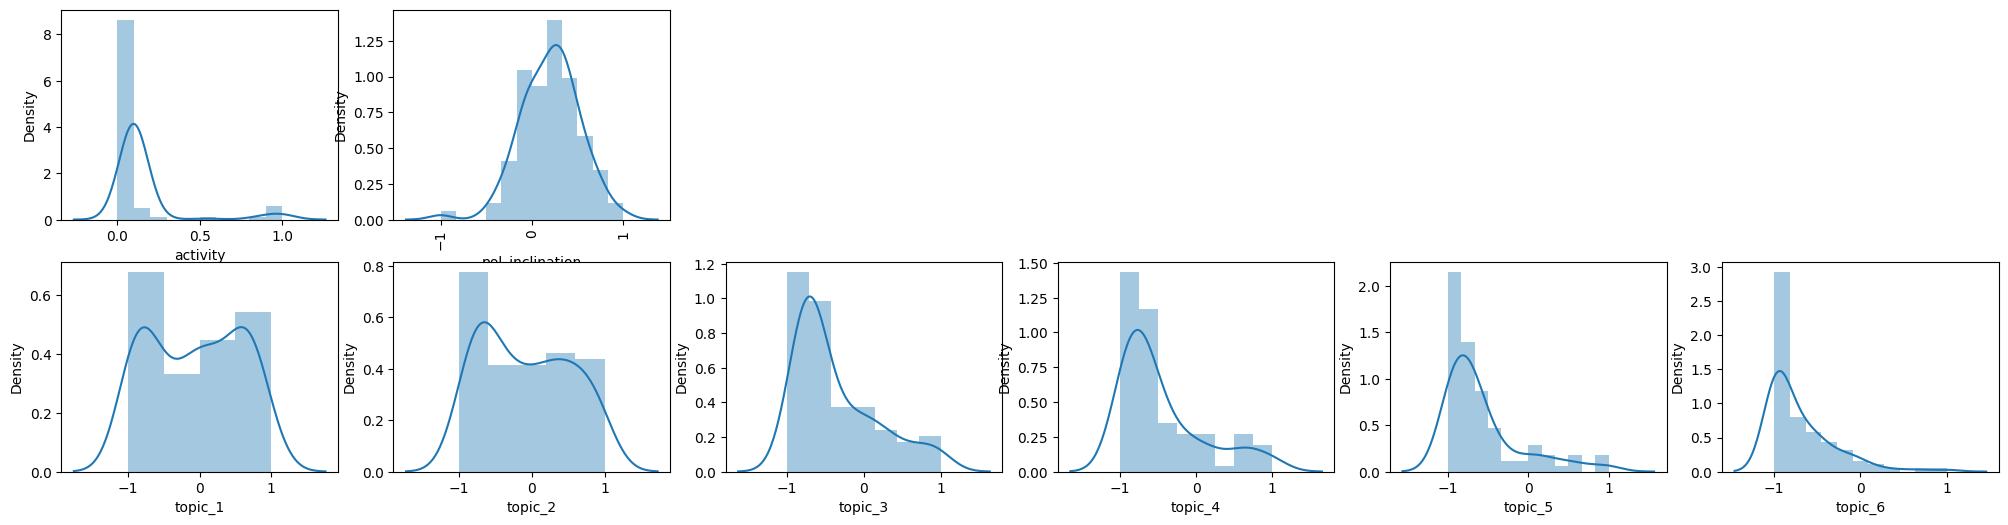

In [225]:
get_data_plot_grid(df)

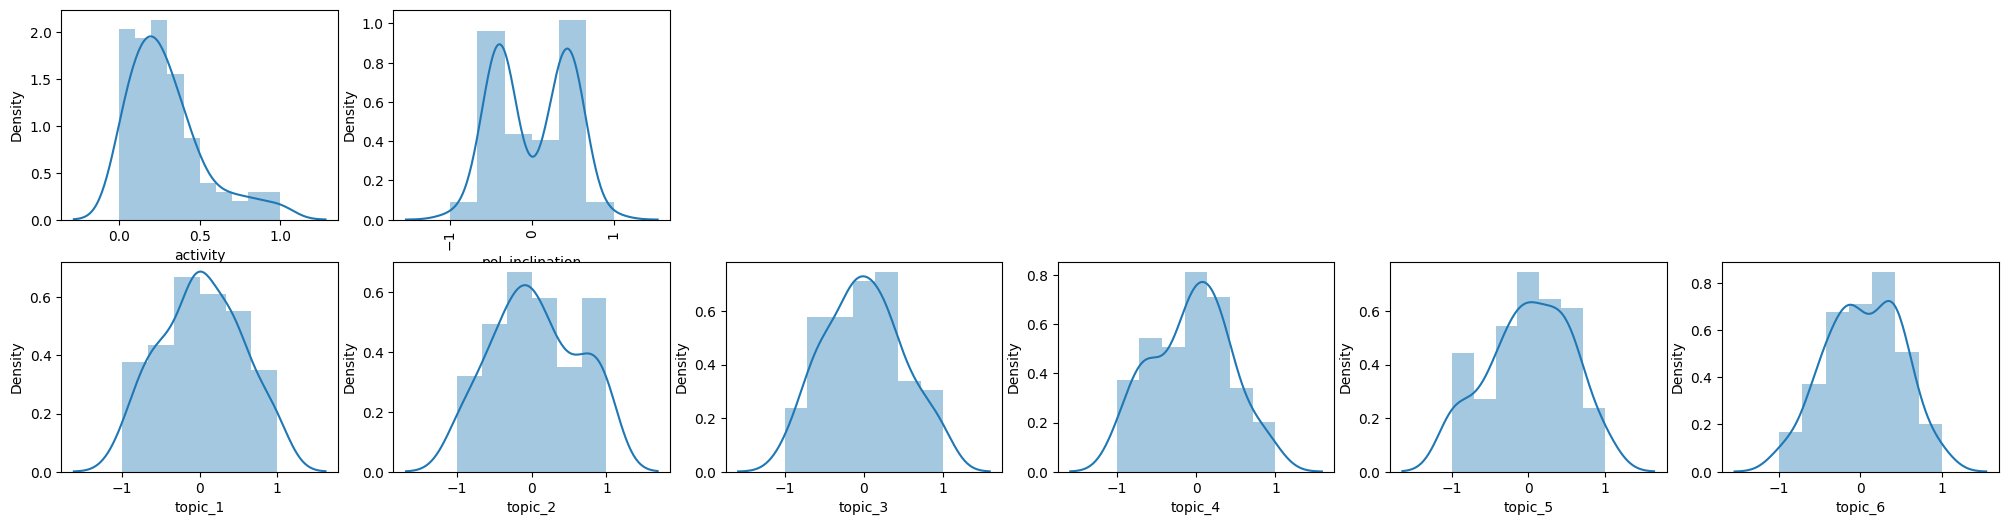

In [226]:
get_data_plot_grid(initial_df)

In [193]:
import pylab as plt

import seaborn as sns

def plot(df_list):
    
    fig, ax = plt.subplots()
    for i, e in enumerate(df_list):
        temp = e
        plt.plot(range(len(temp)), temp)
    # ax.legend()
    plt.legend()
    plt.show()

In [194]:
df_res.columns

Index(['Unnamed: 0', 'topic', 'post_stance', 'author_id',
       'num_of_agents_received', 'num_of_agents_not_received',
       'num_of_spreader_agents', 'num_of_disinterested_agents',
       'network_polarization', 'net_polarization2', 'network_homophily',
       'network_homophily2', 'network_polarity', 'satisfaction', 'activity',
       'user_preference'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


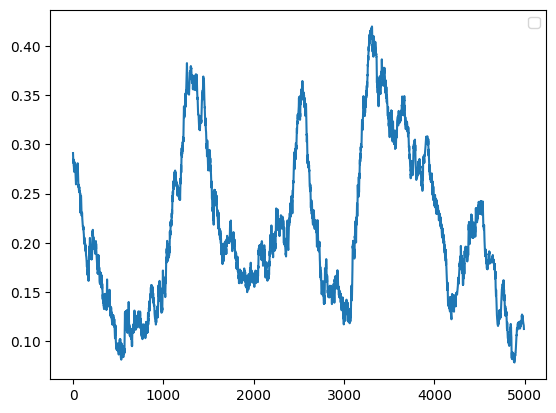

In [221]:
attr = 'user_preference'
exp = [df_res[attr]]
plot(exp)

In [196]:
df_res

,Unnamed: 0,topic,post_stance,author_id,num_of_agents_received,num_of_agents_not_received,num_of_spreader_agents,num_of_disinterested_agents,network_polarization,net_polarization2,network_homophily,network_homophily2,network_polarity,satisfaction,activity,user_preference
0,0,2,1.000000,101,70,32,20,50,0.451284,0.427490,0.009809,0.239172,0.012510,-0.010787,0.300814,0.291296
1,1,4,1.000000,102,79,22,21,58,0.452607,0.428924,0.009809,0.230596,0.012386,-0.041470,0.298475,0.287228
2,2,3,1.000000,101,73,30,21,52,0.453689,0.430212,0.006251,0.222831,0.012367,-0.080757,0.301131,0.284589
3,3,3,0.892502,101,73,30,21,52,0.454811,0.431520,0.006251,0.222831,0.012367,-0.116806,0.305813,0.282828
4,4,3,0.595487,101,73,30,21,52,0.455955,0.432827,0.011897,0.222831,0.012367,-0.141498,0.311447,0.281088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,4987,6,0.397800,101,83,3,9,74,0.377240,0.148523,-0.021335,-0.026165,0.203318,-39.832727,0.337240,0.116887
4988,4988,6,0.334774,101,83,3,9,74,0.377134,0.148467,-0.025089,-0.026165,0.203173,-39.847346,0.293870,0.116389
4989,4989,6,0.418019,101,83,3,9,74,0.377008,0.148405,-0.026068,-0.026165,0.203011,-39.865601,0.250483,0.115886
4990,4990,6,0.347385,101,83,2,8,75,0.377084,0.148320,-0.025855,-0.026149,0.203381,-39.880912,0.206819,0.113945


In [197]:
df_res.author_id.value_counts()

101    3118
102    1764
100     110
Name: author_id, dtype: int64